# HW6

### Author: Joseph Wong

## Import Packages and the Data Set

In [128]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

In [129]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\mirichoi0218\insurance\versions\1


In [130]:
os.listdir(path)

['insurance.csv']

In [131]:
file = path+'\\insurance.csv'
df = pd.read_csv(file)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Overview

In [132]:
df.shape

(1338, 7)

There are 1338 observations and 7 variables.

In [133]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [134]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Numerical**
- **'age' (int):** age of primary beneficiary
- **'bmi' (float):** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **'children' (int):** Number of children covered by health insurance / Number of dependents
- **'charges' (float):** Individual medical costs billed by health insurance

**Categorical**
- **'sex'(object):** insurance contractor gender, female, male
- **'smoker' (object):** Smoking
- **'region' (object):** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

*Variable descriptions taken from https://www.kaggle.com/datasets/mirichoi0218/insurance*

In [135]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no NaNs in the data set.

In [136]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- **'age':** Ages range from 18 to 64, with a median of 39.
- **'bmi':** BMI ranges from 15.96 to 53.13, with a median of 30.4. The median is above the ideal BMI range (18.5-24.9).
- **'children':** Number of children ranges from 0 to 5, with a median of 1.
- **'charges':** Charges range from 1121.8739 to 63770.4280, with a median of 9382.0330.

In [137]:
for col in df.keys():
    print(df[col].value_counts())
    print("--------------------------------------")

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64
--------------------------------------
sex
male      676
female    662
Name: count, dtype: int64
--------------------------------------
bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64
--------------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
--------------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64
-

- **'age':** The distribution of ages seems fairly even across the range.
- **'sex':** The distribution of sexes is fairly even, with 676 males and 662 females.
- **'bmi':** BMI has more unique values because it is a calculation.
- **'children':** 0 is the most common number of children. Having a greater number of children is less frequent.
- **'smoker':** The majority of observations are non-smokers (1064) while a minority smoke (274).
- **'region':** The distribution of regions seems fairly even between the four regions.
- **'charges':** Charges has more unique values because it is continuous.

## Pairplot

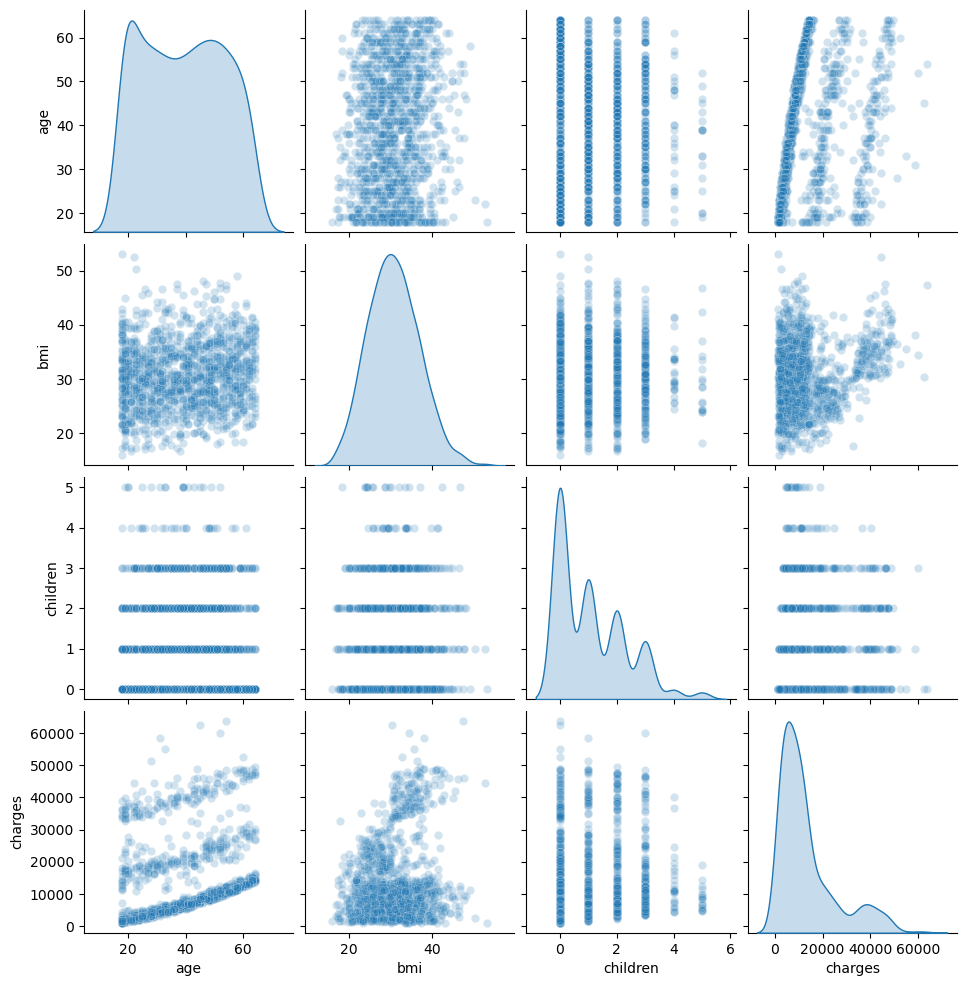

In [138]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2})
plt.show()

The distribution of ages appears to be bimodal, with the main peak around 20 and a lower peak around 50. The distribution of BMI appears to be fairly normal, with a peak around 30. The distribution of children appears to have multiple peaks. They occur at whole numbers because it is a discrete numerical variable. Its main peak is at 0 and decreases in frequency as the age increases. The distribution of charges appears to be skewed right, with its main peak around 5000.

Some notable graphs are the age vs charges and the BMI vs charges plots. We will observe these relationships further later on.

From these graphs, the data set appears to not have any major outliers that would skew results.

## Age vs Charges

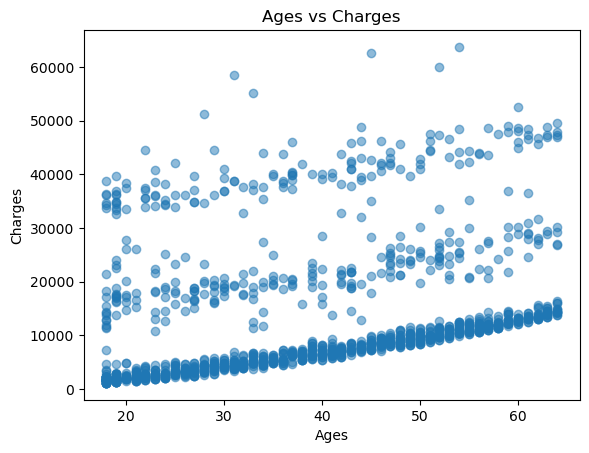

In [139]:
plt.scatter(df['age'],df['charges'],alpha=.5)
plt.title('Ages vs Charges')
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.show()

There is a potential correlation between age and charges. In the sample, older individuals tend to have greater charges. Furthermore, the graph appears to have three lines with similar slopes but starting at different charge amounts. This suggests there could be categories or different starting points within the charges variable that results in these clusters.

## Age vs BMI

In [140]:
fig = px.histogram(df,
                 x='age',
                 y='bmi',
                 histfunc='avg',
                 facet_col='sex',
                 color='sex',
                 color_discrete_map={'female': 'pink','male': 'lightblue'},
                 title="Age vs Average BMI by Sex")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(xaxis_title="age",
                 yaxis_title="average BMI")
fig.show()

The female average BMI appears to be very slightly lower than the male average BMI, but it is too small to be considered significant. For both male and females, there is a potential correlation between age and BMI. As age increases, average BMI increases at a slow rate.

## BMI vs Charges

Text(0, 0.5, 'Charges')

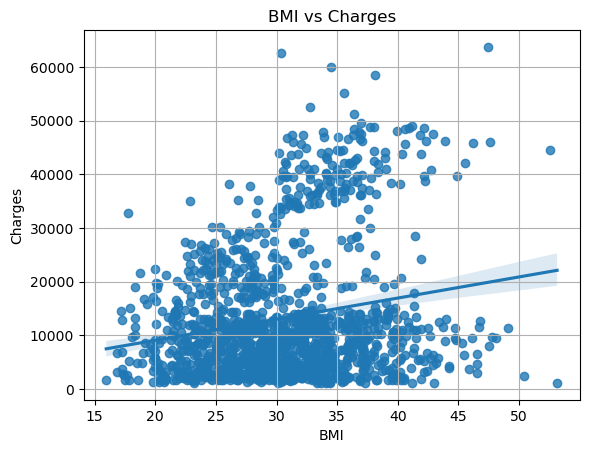

In [141]:
ax = sns.regplot(x="bmi", y="charges", data=df)
ax.set_title("BMI vs Charges")
ax.grid()
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')

There is a potential positive correlation between BMI and charges. As the BMI increases, the charges tend to increase as well. At least, observations with charges above 15,000 appear to have a stronger positive correlation. Observations with charges below 15,000 appear to lack any significant correlation.

Text(0, 0.5, 'Charges')

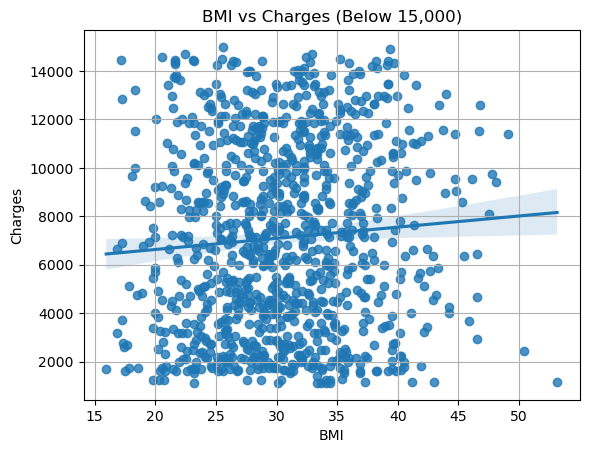

In [142]:
ax = sns.regplot(x="bmi", y="charges", data=df[df['charges']<15000])
ax.set_title("BMI vs Charges (Below 15,000)")
ax.grid()
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')

The graph of charges below 15,000 confirms that there is no significant correlation for this subset of the data.

Text(0, 0.5, 'Charges')

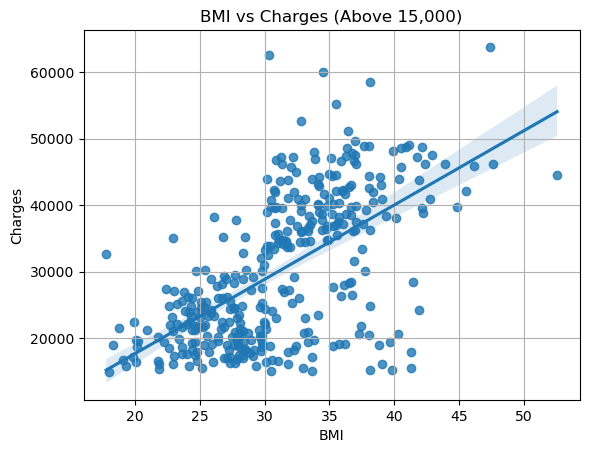

In [143]:
ax = sns.regplot(x="bmi", y="charges", data=df[df['charges']>15000])
ax.set_title("BMI vs Charges (Above 15,000)")
ax.grid()
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')

The graph of charges above 15,0000 confirms that there is a potential positive correlation between BMI and charges, especially those with more expensive charges. Compared to the graph of the entire data set, this masked graph displays a greater slope.

## Number of Children vs Minimum Charge by Smoking Habit

In [144]:
fig = px.histogram(df,
            x='children',
            y='charges',
            histfunc='min',
            facet_col='smoker',
            color='smoker',
            title="Number of Children vs Minimum Charge by Smoking Habit")
# change facet titles individually
new_titles = {"smoker=yes": "smoker", "smoker=no": "non-smoker"}
fig.for_each_annotation(lambda x: x.update(text=new_titles.get(x.text, x.text)))

fig.update_layout(xaxis_title="children",
                 yaxis_title="min charge",
                 showlegend=False)
fig.show()

It appears that smokers, no matter the number of children, tend to have greater minimum charges compared to non-smokers. For both smokers and non-smokers, there appears to be a positive correlation between number of children and minimum charge. That is, as the number of children increases, so does the minimum charge. However, for smokers, the minimum charge amount dips at 2 children which does not follow the positive correlation. This does not affect the overall pattern greatly.